In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../../../../Data/titanic_toy.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [3]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

# Using Sklearn Imputation

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

impute_trf = ColumnTransformer(transformers=[
    ('age',SimpleImputer(strategy='constant', fill_value=99),['Age']),
    ('fare',SimpleImputer(strategy='constant', fill_value=999),['Fare']),
],remainder='passthrough')

In [6]:
X_train_imp = impute_trf.fit_transform(X_train)
X_test_imp = impute_trf.transform(X_test)

In [7]:
np.isnan(X_train_imp).sum(axis=0)

array([0, 0, 0])

# Check Variance

In [8]:
imputed_data = pd.DataFrame([])
imputed_data["Age"] = df['Age']
imputed_data['Age 99'] = df['Age'].fillna(99)
imputed_data['Age minus_1'] = df['Age'].fillna(-1)


imputed_data["Fare"] = df['Fare']
imputed_data['Fare 999'] = df['Fare'].fillna(99)
imputed_data['Fare minus_1'] = df['Fare'].fillna(-1)

imputed_data

,Age,Age 99,Age minus_1,Fare,Fare 999,Fare minus_1
0,22.0,22.0,22.0,7.2500,7.2500,7.2500
1,38.0,38.0,38.0,71.2833,71.2833,71.2833
2,26.0,26.0,26.0,7.9250,7.9250,7.9250
3,35.0,35.0,35.0,53.1000,53.1000,53.1000
4,35.0,35.0,35.0,8.0500,8.0500,8.0500
...,...,...,...,...,...,...
886,27.0,27.0,27.0,13.0000,13.0000,13.0000
887,19.0,19.0,19.0,30.0000,30.0000,30.0000
888,NaN,99.0,-1.0,23.4500,23.4500,23.4500
889,26.0,26.0,26.0,NaN,99.0000,-1.0000


In [12]:
variance_df = pd.DataFrame(
    {
        "Columns":["Age","Fare"],
        "Original Variance":[imputed_data['Age'].var(), imputed_data['Fare'].var()],
        "max_limit Imp Variance":[imputed_data['Age 99'].var(), imputed_data['Fare 999'].var()],
        "min_limit Imp Variance":[imputed_data['Age minus_1'].var(), imputed_data['Fare minus_1'].var()]
    }
)
variance_df

,Columns,Original Variance,max_limit Imp Variance,min_limit Imp Variance
0,Age,211.019125,934.439778,319.247427
1,Fare,2530.673077,2616.433115,2455.887436


# Check Distribution

<Axes: xlabel='Age', ylabel='Density'>

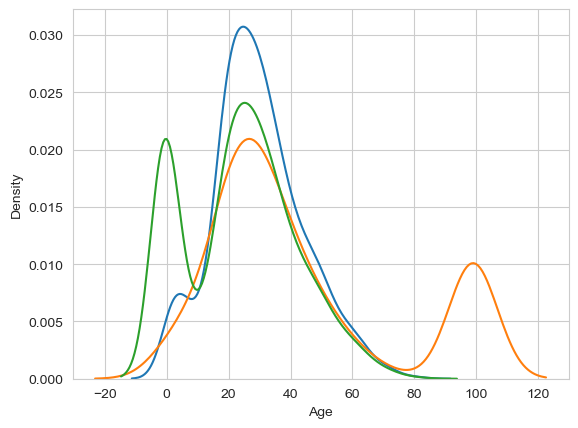

In [13]:
sns.kdeplot(data=imputed_data,x='Age')
sns.kdeplot(data=imputed_data,x='Age 99')
sns.kdeplot(data=imputed_data,x='Age minus_1')

<Axes: xlabel='Fare', ylabel='Density'>

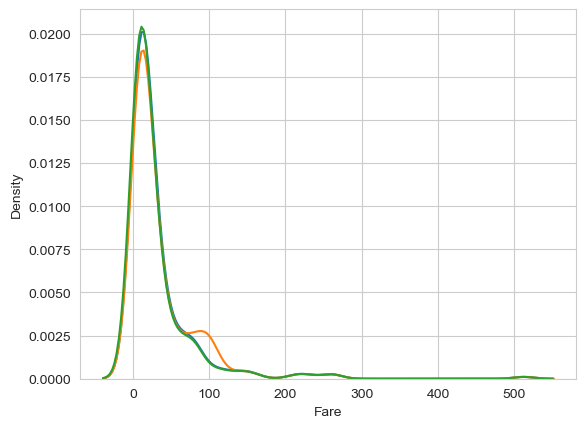

In [15]:
sns.kdeplot(data=imputed_data,x='Fare')
sns.kdeplot(data=imputed_data,x='Fare 999')
sns.kdeplot(data=imputed_data,x='Fare minus_1')

# Check covariance

In [16]:
imputed_data.cov()

,Age,Age 99,Age minus_1,Fare,Fare 999,Fare minus_1
Age,211.019125,211.019125,211.019125,78.071438,75.714922,72.736744
Age 99,211.019125,934.439778,-170.001251,-73.833768,-83.779698,-63.277655
Age minus_1,211.019125,-170.001251,319.247427,122.475966,124.640027,112.115172
Fare,78.071438,-73.833768,122.475966,2530.673077,2530.673077,2530.673077
Fare 999,75.714922,-83.779698,124.640027,2530.673077,2616.433115,2296.119418
Fare minus_1,72.736744,-63.277655,112.115172,2530.673077,2296.119418,2455.887436


In [17]:
imputed_data.corr()

,Age,Age 99,Age minus_1,Fare,Fare 999,Fare minus_1
Age,1.000000,1.000000,1.000000,0.099481,0.096198,0.094827
Age 99,1.000000,1.000000,-0.311252,-0.047700,-0.053581,-0.041771
Age minus_1,1.000000,-0.311252,1.000000,0.135581,0.136376,0.126618
Fare,0.099481,-0.047700,0.135581,1.000000,1.000000,1.000000
Fare 999,0.096198,-0.053581,0.136376,1.000000,1.000000,0.905806
Fare minus_1,0.094827,-0.041771,0.126618,1.000000,0.905806,1.000000


# Boxplot

<Axes: >

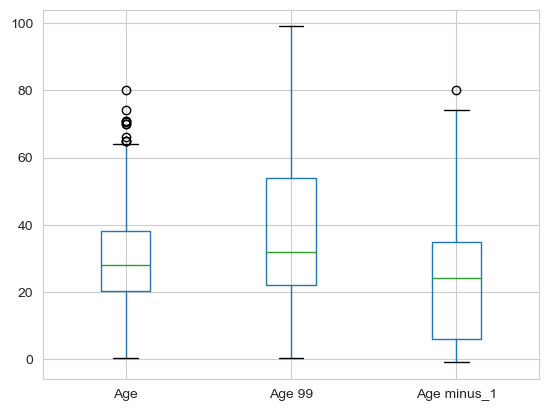

In [18]:
imputed_data.iloc[:,:3].boxplot()

<Axes: >

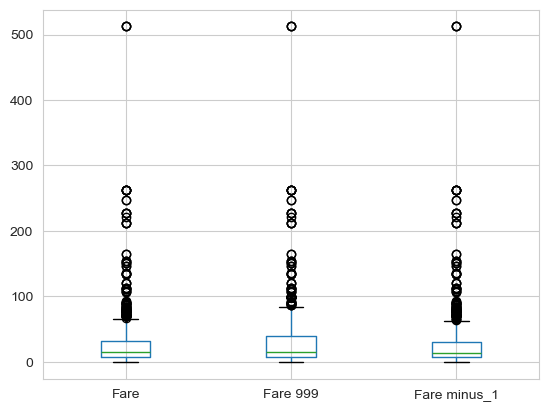

In [19]:
imputed_data.iloc[:,3:].boxplot()